In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# We will be using Synthetic data
N = 1000
X = np.random.random((N,2)) * 6 - 3
# random function return data uniformly distributed b/w 0 and 1. If we *6 and -3, the data gets scaled b/w -3 and +.
X # X is a 2D array uniformly distributed b/w -3 and +3

array([[-2.44277026, -2.62069562],
       [-1.29086081, -2.51722169],
       [ 1.60720776, -1.89135449],
       ...,
       [ 2.89469906,  1.09844654],
       [-2.99926433,  0.26019026],
       [-2.63556487, -1.23002184]])

In [ ]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
# Y is calculated by using some random formula
Y[:6]

array([ 0.16418247, -0.54959109, -0.17719882,  1.06750736,  1.66204996,
       -0.24517229])

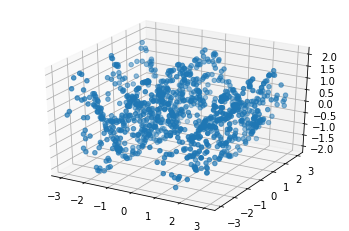

In [ ]:
# Plotting a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0] , X[:,1] , Y)
plt.show();

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9636
Epoch 2/100
32/32 [==============================] - 0s 906us/step - loss: 0.9746
Epoch 3/100
32/32 [==============================] - 0s 927us/step - loss: 0.9542
Epoch 4/100
32/32 [==============================] - 0s 915us/step - loss: 0.8982
Epoch 5/100
32/32 [==============================] - 0s 904us/step - loss: 0.8628
Epoch 6/100
32/32 [==============================] - 0s 892us/step - loss: 0.7836
Epoch 7/100
32/32 [==============================] - 0s 845us/step - loss: 0.7263
Epoch 8/100
32/32 [==============================] - 0s 853us/step - loss: 0.6354
Epoch 9/100
32/32 [==============================] - 0s 861us/step - loss: 0.5858
Epoch 10/100
32/32 [==============================] - 0s 871us/step - loss: 0.5377
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5135
Epoch 13/100
32/32 

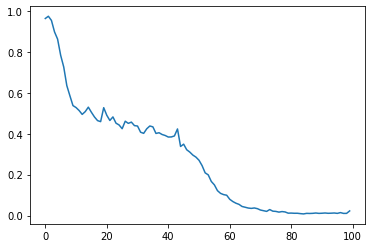

In [ ]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss');

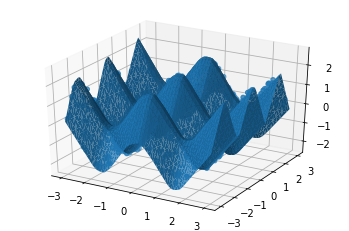

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y); # Train Data

# surface plot
line = np.linspace(-3, +3, 50)
xx, yy = np.meshgrid(line, line)
# xx and yy represents the 1st and 2nd axes respectively
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()
# We flatten this because the output is (N,) and we want it to be (N,1)

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

We can see that the training data and test data are very nicely mapped on the same plane i.e. the NN manages to apprximate the function cos(2 * x1)+cos(3 * x2) quite well.

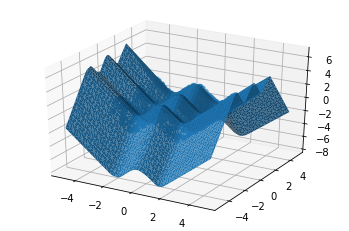

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y); # Train Data

# surface plot
line = np.linspace(-5, +5, 50)
xx, yy = np.meshgrid(line, line)
# xx and yy represents the 1st and 2nd axes respectively
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()
# We flatten this because the output is (N,) and we want it to be (N,1)

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

Observation from extrapolation:

It doesnt work quite well. It assumes that the pattern keeps going in the direction as it was going at the edges.